In the previous episode, we have seen how to write for loops to perform the same operation on many different values. 

And the question now is how to perform the same operation on many different files.

To answer this question we are going to learn how to

- Use a library function to get a list of filenames that match a wildcard pattern.
- Write a for loop to process multiple files.


A typical research scenario for example may involve working with datasets that are in different files.  

Let's say we need a way to get a list of all the files in our data directory whose names start with wave- and end with .csv. To get this list of files we can use the glob library

In [16]:
import glob

The glob library contains a function, also called glob, that finds files and directories whose names match a pattern. We provide those patterns as strings. In these patterns, an asterik matches zero or more characters, while the question matches any one character. We can use this to get the names of all the CSV files in the current directory:

In [17]:
print(glob.glob('waves_*.csv'))

[]


In [18]:
print(glob.glob('data/waves_*.csv'))

['data/waves_90s.csv', 'data/waves_00s.csv', 'data/waves_10s.csv', 'data/waves_80s.csv']


As this example shows, the result of the glob function is a list of files in arbitrary order. 

This means we can loop over this list to do something with each filename in turn.

What we want to do now is to generate a set of plots for each file in our waveheight dataset.

If we want to start by analyzing just the first three files in alphabetical order, we can use the sorted built-in function to generate a new sorted list:

data/waves_00s.csv


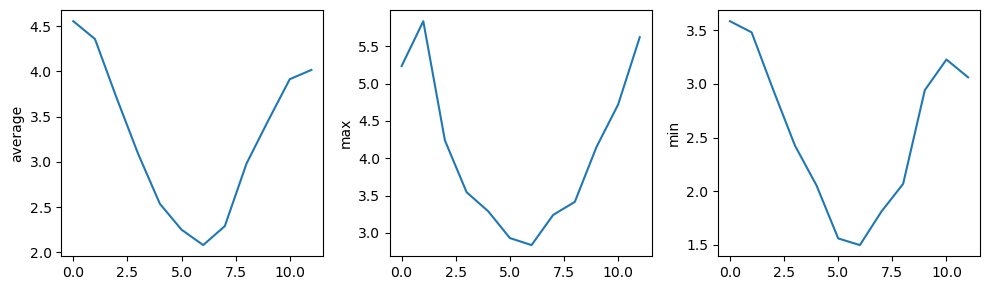

data/waves_10s.csv


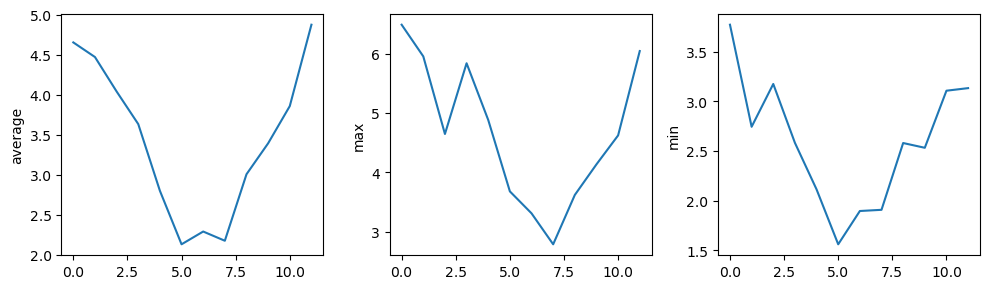

data/waves_80s.csv


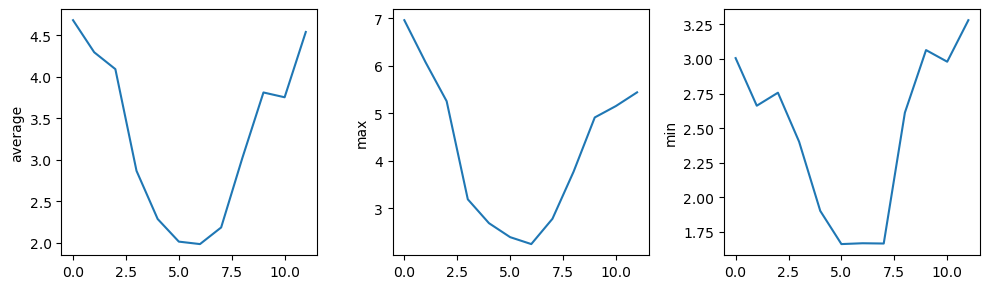

In [19]:
import glob
import numpy
import matplotlib.pyplot

filenames = sorted(glob.glob('data/waves_*.csv'))
filenames = filenames[0:3]

for filename in filenames:
    print(filename)
    
    data = numpy.loadtxt(fname=filename, delimiter=',')
    number_of_rows = data.shape[0]
    number_of_years = number_of_rows//12

    # need to reshape the data for plotting
    data = numpy.reshape(data[:,2], [number_of_years,12])
    
    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))
        
    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

Looking at these three decades, we can see similarities - with the average value representing a smooth climate with clear annual cycle. There are differences year on year, and the minimum and maximum data tend to be more variable than the mean.

# Different types of division

It is also worth mentioning that there are different types of division in Python.

You might have noticed that on purpose we calculated the number of years when reshaping the data, rather than using 10 for each decade. This was useful here because the file containing data from the 2010s only has data from 6 years, but each one of these years did contain data for every month. If any year had missing data from any month, we would have needed to have done some additional preprocessing.

Sometimes, plots can help us spot patterns or problems with data.

Let’s load waves_90s.csv:

In [40]:
data = numpy.loadtxt(fname = "data/waves_90s.csv", delimiter=',')

If we try and take the mean for the entire year, we’ll see that there must be NaNs:

In [41]:
numpy.mean(data[:,2])

nan

In [42]:
data.shape

(120, 3)

In [43]:
number_of_rows = data.shape[0]
number_of_years = number_of_rows//12
data = numpy.reshape(data[:,2], [number_of_years,12])

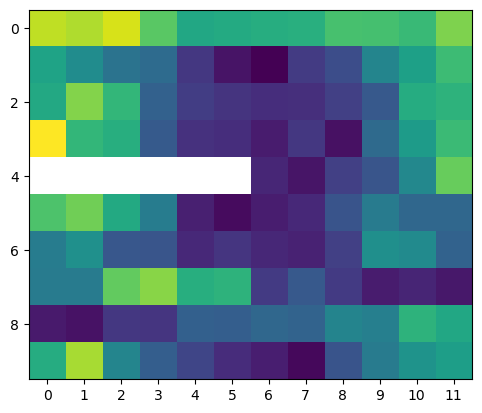

In [45]:
matplotlib.pyplot.imshow(data)
matplotlib.pyplot.yticks(label=range(1990,2000, 10))
matplotlib.pyplot.xticks(range(12))
matplotlib.pyplot.show()

We can clearly see that there must have been some problem with the collection of data in the first 6 months of 1994. Apart from that, the rest of the data looks relatively sensible, with low wave heights in the summer months of the decade, and higher wave heights in the winter months of the decade. 

There are other ways that we could have determined where the missing data is. The Numpy function isnan will tell us whether any given value is NaN; if we give it an ndarray, it will return an ndarray of the same shape with boolean values (True or False) showing if the value at that index was a NaN. argwhere will return the indices for an ndarray of booleans where the value is True.

In [24]:
numpy.argwhere(numpy.isnan(data))

array([[4, 0],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4],
       [4, 5]])

There are almost always multiple ways to achieve the same result in programming, and often the choice as to which method to use comes down to personal preference. Some people might prefer to look at patterns in plots, while others may be happy to look at summary statistics and aggregate values from tabular data to come to the same conclusion.

The key takeaways of this episode are that:

    - we can use the glob function to create a list of files whose names match a pattern.
    - in patterns, when we use an asterik it matches zero or more characters, and when we use ? it matches any single character.